In [5]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

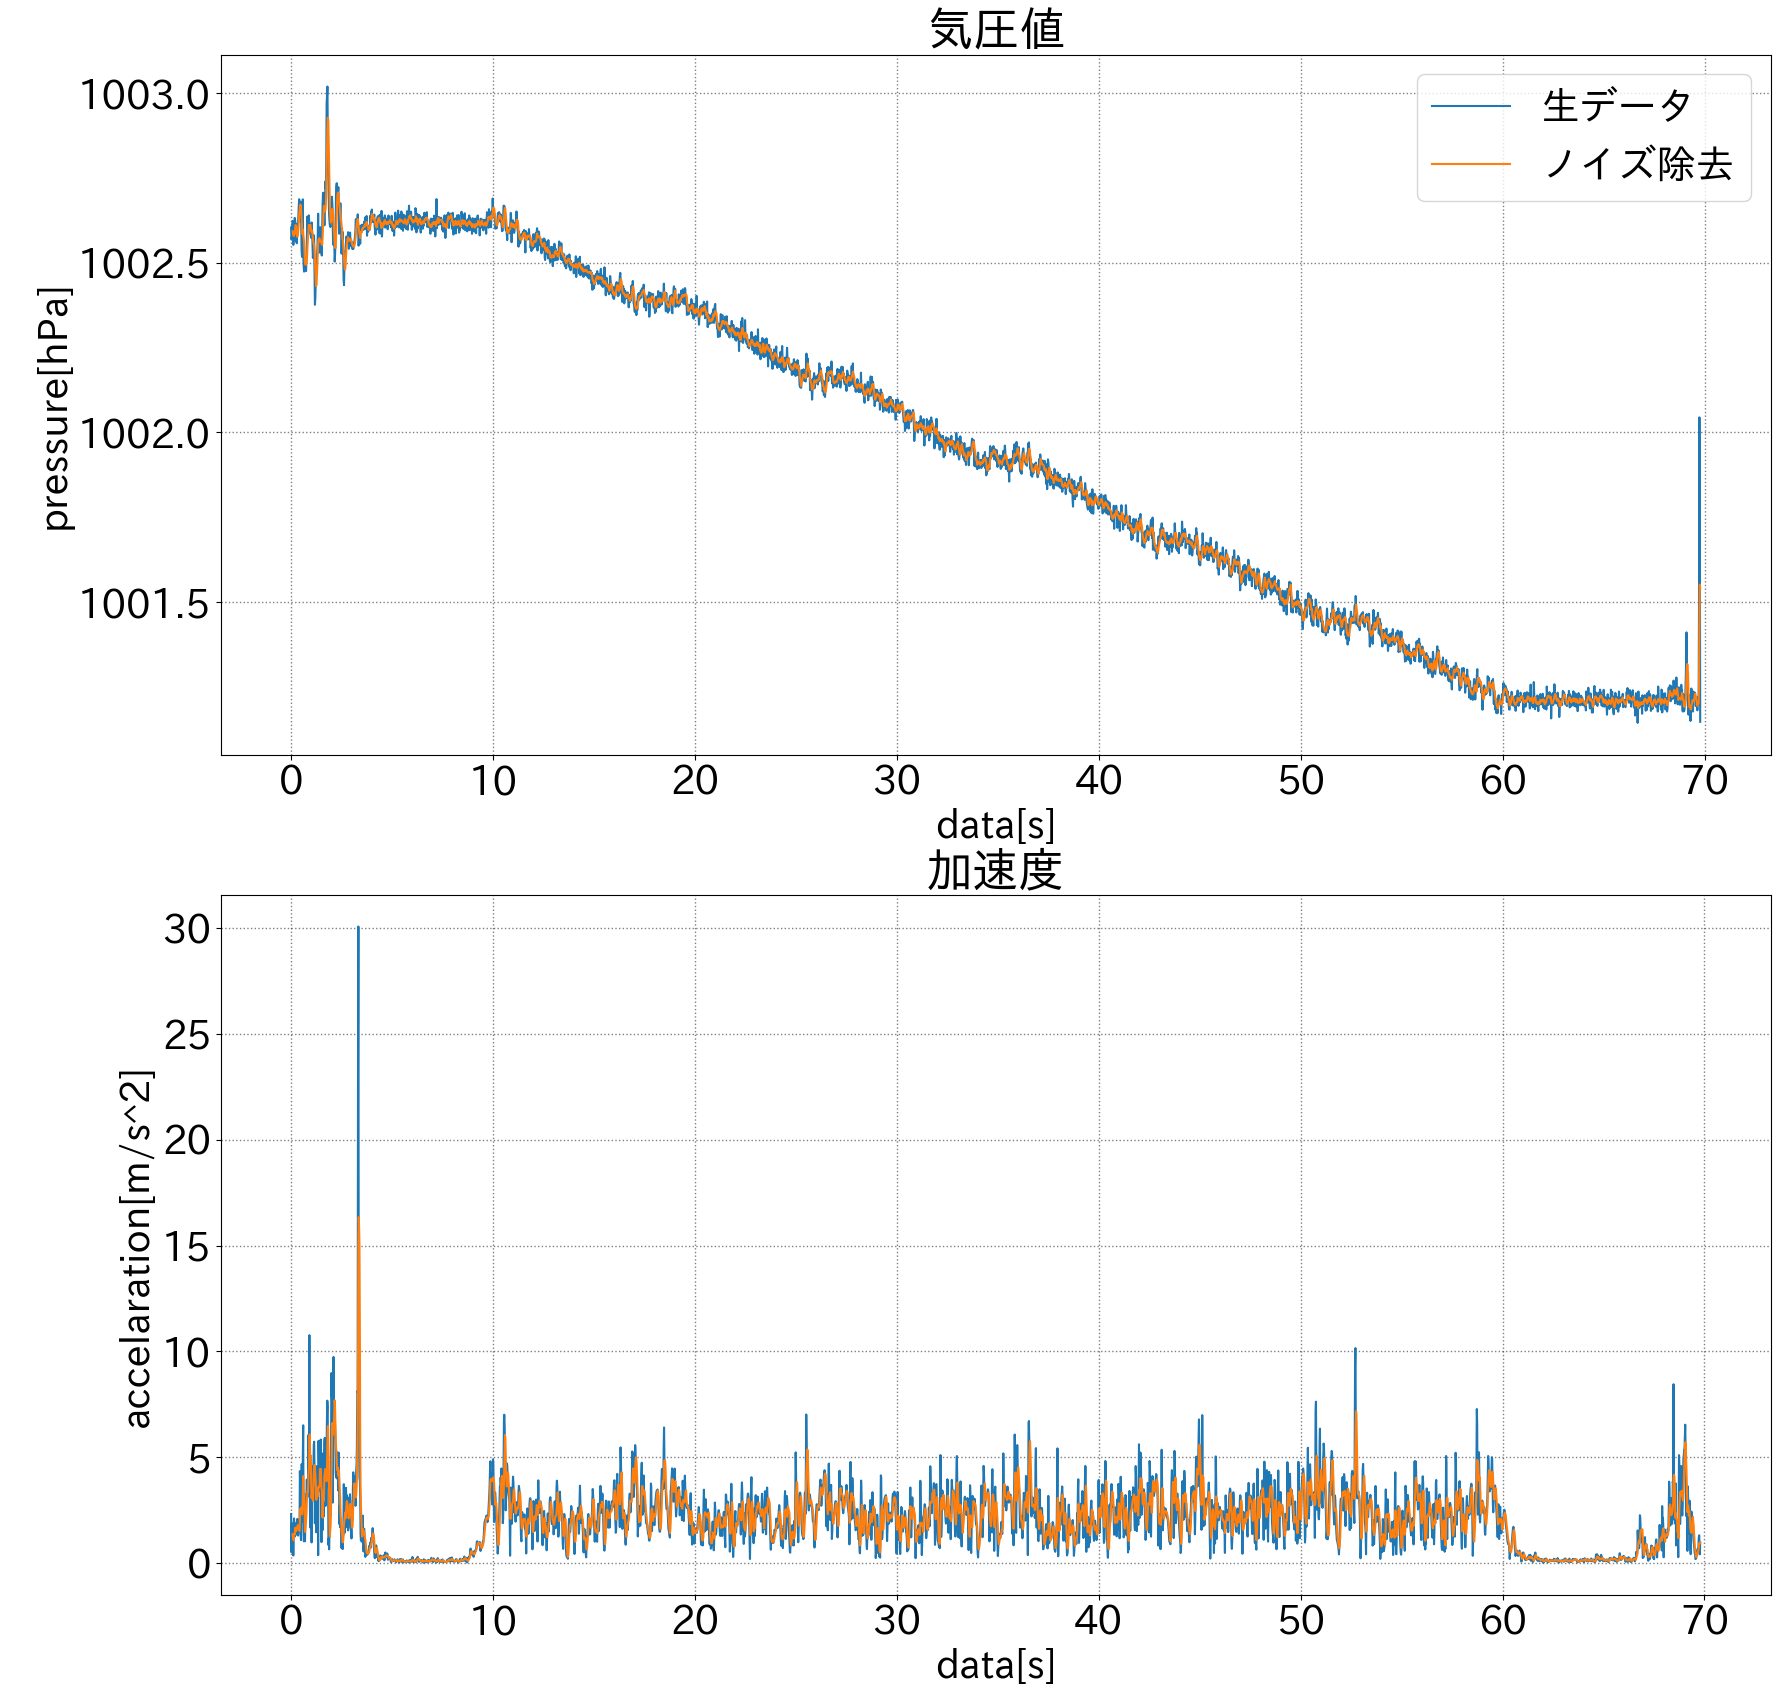

In [17]:
#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28

# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "study"
press = pd.read_csv(fname+"_pressure.csv", encoding = 'utf-8')
acc = pd.read_csv(fname+"_acc.csv",encoding = 'utf-8')

# データの操作

## グラフの大きさの指定
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax1 = fig.add_subplot(2, 1, 1)
## グリッドの設定
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax1.set_title("気圧値")
## x軸のラベル
ax1.set_xlabel('data[s]')
## y軸のラベル
ax1.set_ylabel('pressure[hPa]')
## y軸の値をオフセットなしで表示
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています
ax1.plot((press["time"]-press["time"][0])/1000, press["pressure"], label="生データ")

# データの操作
## ノイズ除去
ax1.plot((press["time"]-press["time"][0])/1000, press["pressure"].rolling(window=5).mean(), label="ノイズ除去")

ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title("加速度")
ax2.set_xlabel('data[s]')
ax2.set_ylabel('accelaration[m/s^2]')
ax2.plot((acc["time"]-acc["time"][0])/1000, ((acc["x"]**2 + acc["y"]**2 + acc["z"]**2)**0.5), label="ノルム")
ax2.plot((acc["time"]-acc["time"][0])/1000, ((acc["x"]**2 + acc["y"]**2 + acc["z"]**2)**0.5).rolling(window=5).mean(), label="ノルム + ノイズ除去")

# x = ax2.plot((acc["time"]-acc["time"][0])/1000, acc["x"].rolling(window=5).mean(), label="x")
# y = ax2.plot((acc["time"]-acc["time"][0])/1000, acc["y"].rolling(window=5).mean(), label="y")
# z = ax2.plot((acc["time"]-acc["time"][0])/1000, acc["z"].rolling(window=5).mean(), label="z")
# ax2.legend(handles = x + y + z)

## 説明
- importシリーズ
    - `import numpy as np`
    - `import pandas as pd`
    - `import matplotlib`
    - `import matplotlib.pyplot as plt`：グラフ表示用
- `plt.rcParams["font.size"] = フォントサイズ`：
フォントサイズを変更
後で説明するグラフサイズの場合は30くらい
- `csv = pd.read_csv("ファイル名(.csv)", encoding = 'utf-8')`：
csvファイル（ヘッダ（項目名）あり）を読み込む
読み込んだファイルは`csv["ヘッダ"][データ番号]`で確認できる
`encoding = 'utf-8'`はヘッダ名が日本語の場合は必須
ヘッダなしの場合`csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])`で可能
namesの部分でヘッダ名を指定する
- `fig = plt.figure(figsize=(横サイズ, 縦サイズ))`：
グラフのサイズを指定
- `ax1 = fig.add_subplot(行数, 列数, 場所番号)`：
一つの画像内に複数のグラフを表示させる場合に使用
変数にそれぞれのグラフを指定してあげる
以降`ax1.~~~`が出てくるが，`plt.~~~~`でもできる（少し関数名が変わるけど）
場所番号は左上を１として右優先で割り振られている
<img width="500" alt="output.png (552.4 kB)" src="https://img.esa.io/uploads/production/attachments/13979/2022/10/03/84973/743250fd-d481-409a-bbc4-8e4eaff5c761.png">

- `ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)`：
グラフ内にグリッドを表示
- `ax1.set_title("タイトル")`：
グラフのタイトルを指定
- `ax1.set_xlabel('ラベル名')`：
x軸のラベル名を指定
- `ax1.set_ylabel('ラベル名')`：
y軸のラベル名を指定
- `ax1.get_yaxis().get_major_formatter().set_useOffset(False)`：
y軸の数値のオフセット表示をさせないようにする
↓こういうの（y軸）
<img width="500" alt="image.png (102.3 kB)" src="https://img.esa.io/uploads/production/attachments/13979/2022/09/29/84973/03fcc6f3-37ef-4718-8231-79aec954c96b.png">

設定するとこうなる↓

<img width="500" alt="image.png (111.4 kB)" src="https://img.esa.io/uploads/production/attachments/13979/2022/09/29/84973/c512a9df-8ac0-4c73-9a2c-9283bd4294b3.png">

x軸の場合は`ax1.get_xaxis().get_major_formatter().set_useOffset(False)`
- `ax1.plot(x軸データ,y軸データ,label="ラベル名")`：
グラフにデータを表示
他の表示方法として`acc.plot(x="time", ax=ax4)`もある
こちらだとCSV内のデータを全て出力する
- `ax1.legend()`：
データのラベルを表示
[ラベル（凡例）について（表示関係の引数の説明付き）](https://www.yutaka-note.com/entry/matplotlib_legend)
引数`handles`なしの場合はplot時に指定したlabelが表示される
`handles`は個別にラベルを指定する用
`handles`を使う場合をax2でやってる


コードにはないけど知っておくといいもの
- `ax1.set_xlim([x1,x2])`, `ax1.set_ylim([y1,y2])`：
グラフのx1~x2(y1~y2)区間を表示